## **Build a timeseries model for forecasting number of customers of a particular store**

  One of the leading retail stores in the US, ABC, would like to predict the customers and demand accurately. There are certain events and holidays which impact sales on each day. There are customers data available for 51 stores of ABC. The business is facing a challenge due to unforeseen demands and runs out of stock sometimes, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like promotions, state and school holidays conditions.
ABC runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. Part of the challenge presented by this competition is modelling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical data for 51 stores located in different regions are availab
le.
The dataset contains 51 stores’ customers data along with other details like day of the week, store id, promotion and holidays details  from Jan 2014 to2016.


# Data Dictionary


**Date** : Date 

**Store**:Store id

**Day of Week**: Day of the week (encoded):  
1: Sunday 2: Monday… 7: Saturday 

**Customers**: Number of customers on a given day 

**Open** : An indicator for whether the store is open:  
0: Close; 1: Open 

**Promotion**: An Indicator whether a store is running a promotion on given day. 
0: No Promotion; 1: Promotion 

**State Holiday**: Indicates a state holiday; Normally all stores, with few exceptions, are closed on state holidays.  
0: No state holiday; ‘a’, ’b, ’c’: different types of holidays 

**School Holiday**: An indicator if the (Store, Date) was affected by the closure of public schools 

## Initial Guidelines:
1. Ensure to follow to Use Id’s provided by UNext for naming file as conventions.
2. Create GitHub account and submit the GitHub link.


### Loading required libraries and packages 

In [1]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn import metrics
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline
import statsmodels.api as sm
# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from timeit import default_timer as timer
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

##  Task 1 : Load the dataset and perform preliminary EDA (Exploratory Data Analysis) with key observations and insights-  (weightage - 25 marks)

#### T1.1: Load the dataset making ‘Date’ as time stamp and index using try and except blocks.                   (weightage - 2 marks) (AE)

HINT : Add parse_dates = True and index_col = 'Date' while loading the df since we are using timeseries data

In [4]:
def load_the_dataset():
    try:
        Store50 = pd.read_excel("store50.xlsx",parse_dates = True, index_col = 'Date')
        return Store50
    except :
        print("File not found. Please check the file path.")

In [5]:
# store the result of the dataset
Store50=load_the_dataset()
Store50.head()

Store  Day Of Week  Customers  Open  Promotion State Holiday  \
Date                                                                        
2016-01-01  1036.0          4.0        0.0   0.0        0.0             0   
2016-01-01  1027.0          4.0        0.0   0.0        0.0             0   
2016-01-01  1004.0          4.0        0.0   0.0        0.0             0   
2016-01-01  1014.0          4.0        0.0   0.0        0.0             0   
2016-01-02  1044.0          7.0        0.0   0.0        0.0             0   

            School Holiday  
Date                        
2016-01-01             1.0  
2016-01-01             1.0  
2016-01-01             1.0  
2016-01-01             1.0  
2016-01-02             0.0

#### T1.2:  Find the number of unique stores                     (weightage - 2 marks) (AE)

In [6]:
Store50.head()

Store  Day Of Week  Customers  Open  Promotion State Holiday  \
Date                                                                        
2016-01-01  1036.0          4.0        0.0   0.0        0.0             0   
2016-01-01  1027.0          4.0        0.0   0.0        0.0             0   
2016-01-01  1004.0          4.0        0.0   0.0        0.0             0   
2016-01-01  1014.0          4.0        0.0   0.0        0.0             0   
2016-01-02  1044.0          7.0        0.0   0.0        0.0             0   

            School Holiday  
Date                        
2016-01-01             1.0  
2016-01-01             1.0  
2016-01-01             1.0  
2016-01-01             1.0  
2016-01-02             0.0

In [7]:
## List the number of unique stores for which we have the data?
def unique_store():
    uniq=Store50['Store'].unique()
    return uniq
unique_store()

array([1036., 1027., 1004., 1014., 1044., 1041., 1047., 1012., 1037.,
       1005., 1011., 1043., 1001., 1048., 1030., 1035., 1013., 1029.,
       1042., 1017., 1032., 1024., 1006., 1007., 1002., 1019., 1000.,
       1009., 1023., 1016., 1050., 1031., 1010., 1034., 1039., 1033.,
       1045., 1015., 1022., 1040., 1046., 1021., 1028., 1008., 1025.,
       1020., 1038., 1003., 1018., 1026., 1049.,   nan])

#### T1.3 Find the number of observations for each store?     (weightage - 2 marks) (AE)
**print your answer in this format only for validation:          
**total number of observations in 1036.0 = ###**

**total number of observations in 1027.0 = ###**

In [8]:
def no_obs_store():
    uniq=Store50['Store'].unique()
    for i in uniq:
        print(f'total number of observations in {i}=',len(Store50[Store50['Store']==i]))
no_obs_store()

total number of observations in 1036.0= 852
total number of observations in 1027.0= 852
total number of observations in 1004.0= 852
total number of observations in 1014.0= 852
total number of observations in 1044.0= 852
total number of observations in 1041.0= 852
total number of observations in 1047.0= 852
total number of observations in 1012.0= 852
total number of observations in 1037.0= 668
total number of observations in 1005.0= 852
total number of observations in 1011.0= 852
total number of observations in 1043.0= 852
total number of observations in 1001.0= 668
total number of observations in 1048.0= 852
total number of observations in 1030.0= 852
total number of observations in 1035.0= 852
total number of observations in 1013.0= 852
total number of observations in 1029.0= 852
total number of observations in 1042.0= 852
total number of observations in 1017.0= 668
total number of observations in 1032.0= 852
total number of observations in 1024.0= 852
total number of observations in 

#### T1.4: Find the list of store ids which are having less number of observations compared to other stores?                                        (weightage - 2 marks) (AE)

###### HINT: Highest number of observations is 852, print all stores ids having number of observations less than 852 

In [9]:
def less_obs_stores():
    uniq=Store50['Store'].unique()
    for i in uniq:
        if len(Store50[Store50['Store']==i])<852:
            print(i)
less_obs_stores()

1037.0
1001.0
1017.0
1006.0
1002.0
1000.0
1023.0
1025.0
1038.0
nan


#### T1.5: Find the average number of customers for the given store ids:1041, 1044?  (weightage - 4 marks) (AE)
**-Print your answer in this format only for validation:

**Store 1041 : ###.#** 

**Store 1044 : ###.#**

In [10]:
## Selecting the store 1044 only for analysis.
## Here, we are also reversing the data as we need to contiguous data in the ascending order for a Time Series Analysis.
def avg_cust_store():
    Store50_1044 = Store50[Store50.Store == 1044].sort_index(ascending=True)
    Store50_1041 = Store50[Store50.Store == 1041].sort_index(ascending=True)
    print("Store 1041 : ",round(Store50_1041.Customers.mean(),0))
    print("Store 1044 : ",round(Store50_1044.Customers.mean(),0))
    
avg_cust_store()

Store 1041 :  700.0
Store 1044 :  474.0


#### T1.6: Draw the time series plot (using pandas only) on weekly aggregation (by resampling method) of number of customers for the Store ids 1041 & 1044?       (weightage - 4 marks) (ME)

** HINT - Create a dataframe of store 1041 and store 1044 according to customers.

In [11]:
Store50_1044 = Store50[Store50.Store == 1044]. sort_index(ascending=True)
Store50_1041 = Store50[Store50.Store == 1041]. sort_index(ascending=True)
df = pd.DataFrame(columns=['Store_1041','Store_1044'])
df['Store_1044'] = Store50_1044['Customers']
df['Store_1041'] = Store50_1041['Customers']
df

Store_1041  Store_1044
Date                              
2014-01-01         0.0         0.0
2014-01-02       742.0       473.0
2014-01-03       864.0       483.0
2014-01-04         0.0         0.0
2014-01-05         0.0         0.0
...                ...         ...
2016-06-01         0.0       709.0
2016-06-02       918.0       686.0
2016-06-03       651.0       582.0
2016-06-04       972.0       695.0
2016-06-05       954.0       652.0

[852 rows x 2 columns]

The 'Customers' variable is our desired Time Series. So let us plot it to understand how the series looks like. This is a daily series.

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

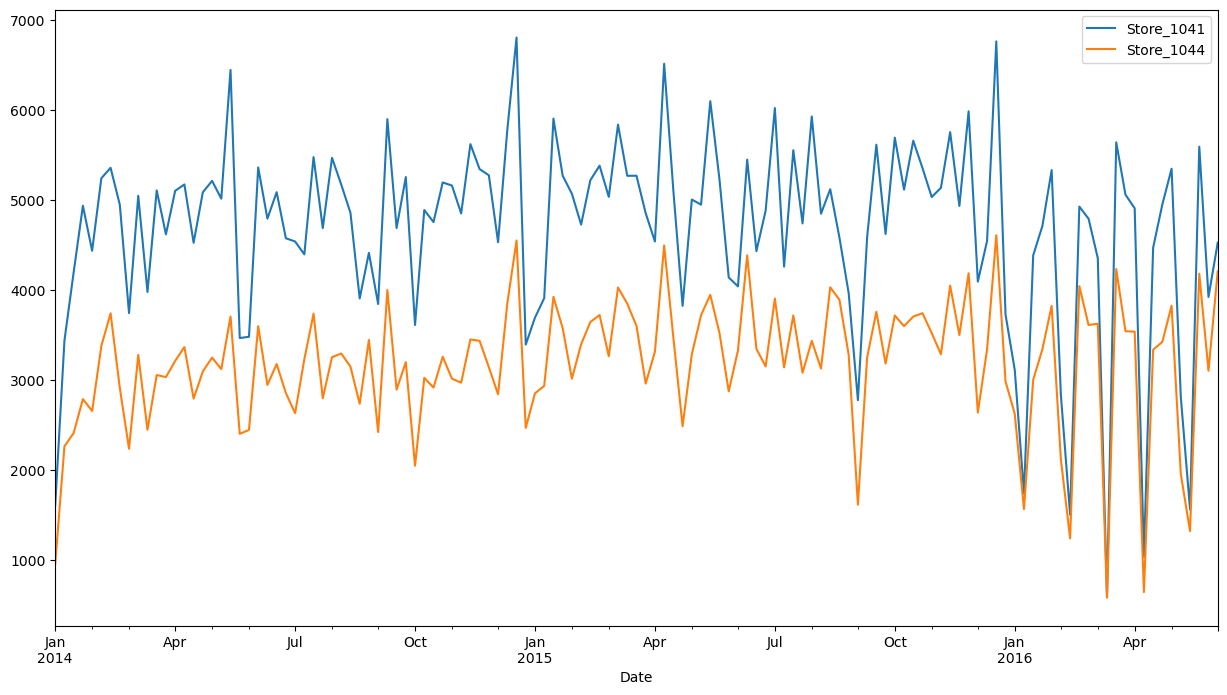

In [13]:
## Resample the data into a weekly time series to understand how the number of customers change weekly.

df.resample('W').sum().plot();

#### T1.7: Draw the time series plot (using pandas only) on monthly aggregation (by resampling method) of number of customers for the Store ids 1041 & 1044?   (weightage - 2 marks) (ME)

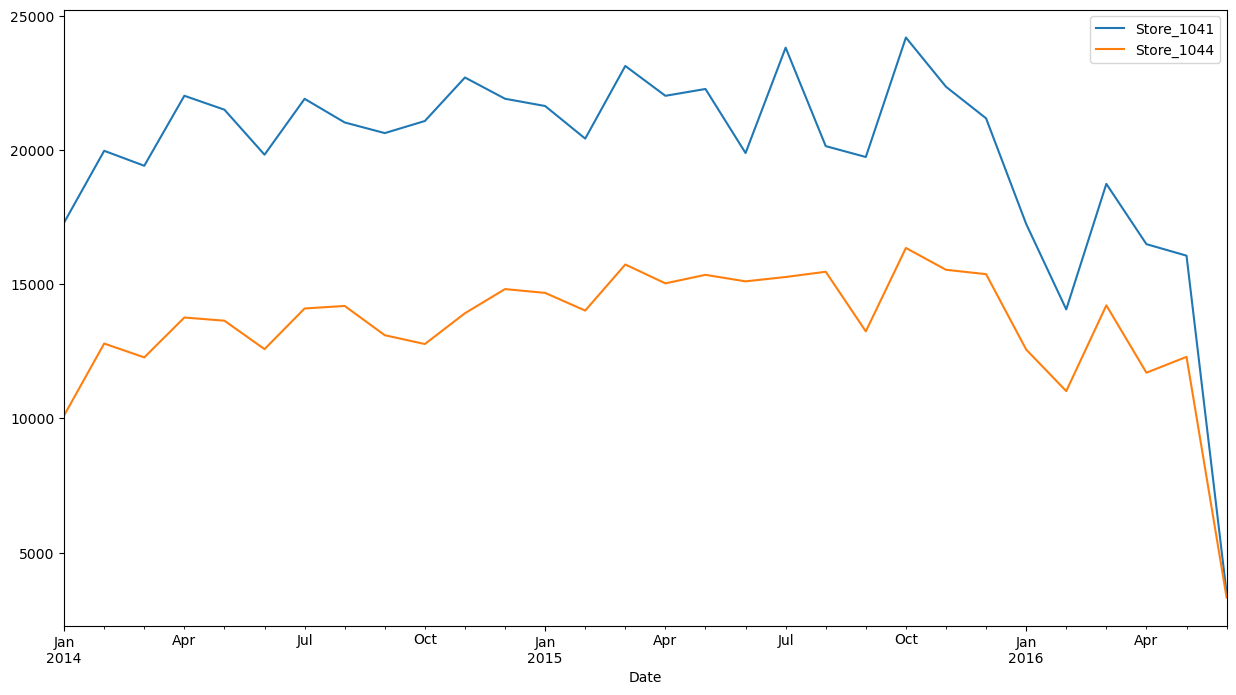

In [14]:
## Resample the data into a monthly time series to understand how the number of the customers change monthy?
df.resample('M').sum().plot();

#### T1.8: Which store id dominates(out of 1041 & 1044) in both weekly and monthly customers aggregation?      (weightage - 2 marks) (AE)  

HINT - Get the aggregration based on average and return the store ID in the format given below  
**Store ####**

In [15]:
def store_id_max_weekly():
    max_id = df.resample('M').sum().sum().idxmax()
    return max_id

store_id_max_weekly()

'Store_1041'

In [16]:
def store_id_max_monthly():
    max_id = df.resample('W').sum().sum().idxmax()
    return max_id

store_id_max_monthly()

'Store_1041'

#### T1.9: Save the dataset (weekly aggregated data related to number of customers for store id 1041 & 1044 in csv file as ‘weekly_1041.csv’ and ‘weekly_1044.csv’ ) in your GitHub repository for model building process. (This task is for maintaining the version control of datasets)                  (weightage - 1 mark) (ME)

HINT - Use df.resample() weekly sum for only store_1044 and create a csv file for it 
Use the df.resample() weekly sum for onyl store_1041 also and create a separate csv file for it

In [17]:
df_weekly_1041= df.resample('W').sum()
df_weekly_1041.drop('Store_1044', axis=1, inplace=True)
df_weekly_1041

Store_1041
Date                  
2014-01-05      1606.0
2014-01-12      3439.0
2014-01-19      4199.0
2014-01-26      4937.0
2014-02-02      4437.0
...                ...
2016-05-08      2809.0
2016-05-15      1561.0
2016-05-22      5594.0
2016-05-29      3924.0
2016-06-05      4527.0

[127 rows x 1 columns]

In [18]:
df_weekly_1044= df.resample('W').sum()
df_weekly_1044.drop('Store_1041', axis=1, inplace=True)
df_weekly_1044

Store_1044
Date                  
2014-01-05       956.0
2014-01-12      2263.0
2014-01-19      2412.0
2014-01-26      2789.0
2014-02-02      2656.0
...                ...
2016-05-08      1954.0
2016-05-15      1321.0
2016-05-22      4182.0
2016-05-29      3104.0
2016-06-05      4208.0

[127 rows x 1 columns]

In [19]:
weekly_1041= df_weekly_1041.to_csv('weekly_1041.csv')
weekly_1044= df_weekly_1044.to_csv('weekly_1044.csv')

## Task 2: Building forecasting models and metrics evaluation. (weightage - 50 Marks) 

#### T2.1: Use the weekly_1041 and weekly_1044 data and Conduct stationarity test(ADF) for both weekly aggregated data(1041 &1044) ?  (weightage - 10 Marks) (AE and ME)
 Are they both exhibit stationary? State your results of the Augmented Dicky Fuller(ADF) test

Print your output in the given format :

**Data is stationary       
Data is not stationary**

**Checking for stationarity of data using ADF test function:**

In [20]:
## Defning a function
def adf_test(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    dftest = adfuller(timeseries,regression='ct')#running the adf test on the input time series
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    ## creating a series to format the output
    for key,value in dftest[4].items():##running a for loop to format the critical values of the test statistic
       dfoutput['Critical Value (%s)'%key] = value
    if dfoutput[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary")

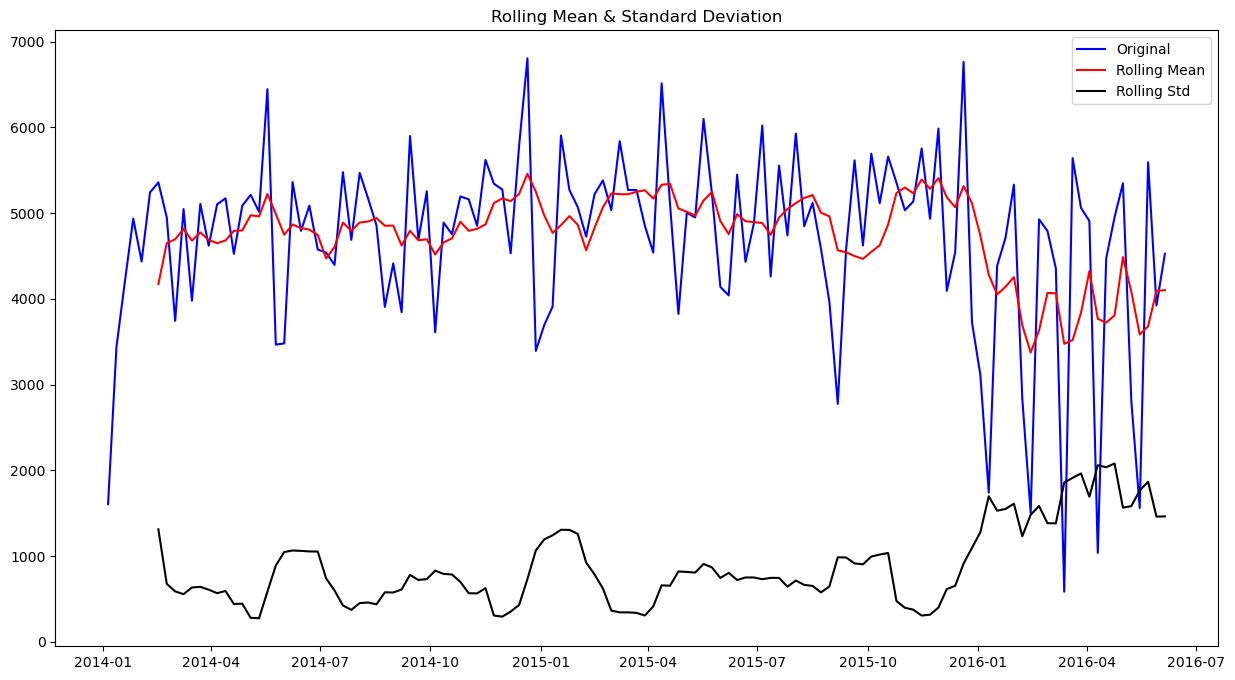

Data is stationary


In [21]:
adf_test(df_weekly_1041)

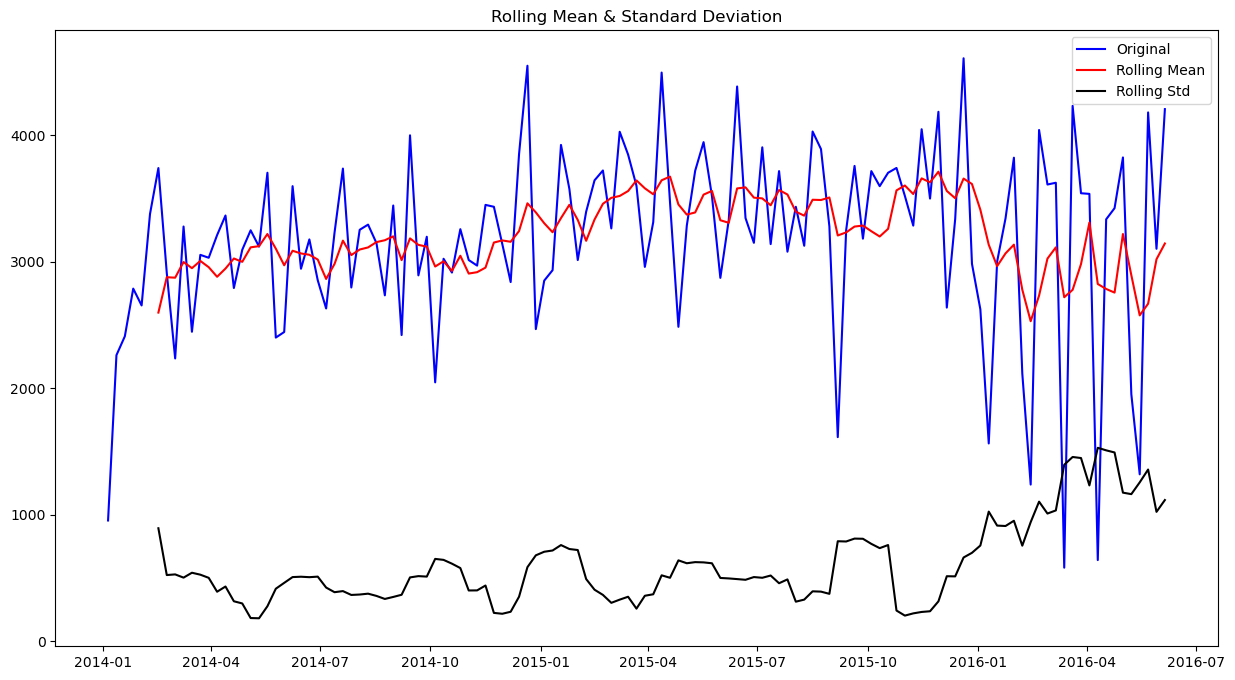

Data is stationary


In [22]:
  adf_test(df_weekly_1044)

Series is stationary and hence no need for differentiation.

#### T2.2 :Split the data into train and test (consider  2016 year  for test data)                                   (weightage - 5 Marks) (AE)

Perform the split for store 1041 data and store 1044 separately and return the train_1041, test_1041 and train_1044,test_1044

In [23]:
def train_test_split_1041():# Split the data into train and test ( consider year 2016 for test data) 
    train_1041=df_weekly_1041[df_weekly_1041.index.year !=2016]
    test_1041=df_weekly_1041[df_weekly_1041.index.year ==2016]
    return train_1041,test_1041
train_1041=train_test_split_1041()[0]
test_1041=train_test_split_1041()[1]

In [24]:
def train_test_split_1044():# Split the data into train and test ( consider year 2016 for test data) 
    train_1044=df_weekly_1044[df_weekly_1044.index.year !=2016]
    test_1044=df_weekly_1044[df_weekly_1044.index.year ==2016]
    return train_1044,test_1044
train_1044=train_test_split_1044()[0]
test_1044=train_test_split_1044()[1]

In [25]:
train_1041

Store_1041
Date                  
2014-01-05      1606.0
2014-01-12      3439.0
2014-01-19      4199.0
2014-01-26      4937.0
2014-02-02      4437.0
...                ...
2015-11-29      5987.0
2015-12-06      4094.0
2015-12-13      4546.0
2015-12-20      6764.0
2015-12-27      3728.0

[104 rows x 1 columns]

#### T2.3: Draw the ACF and PACF plot for the above train data for both the stores (1041 and 1044) (weightage - 6 Marks) (ME)

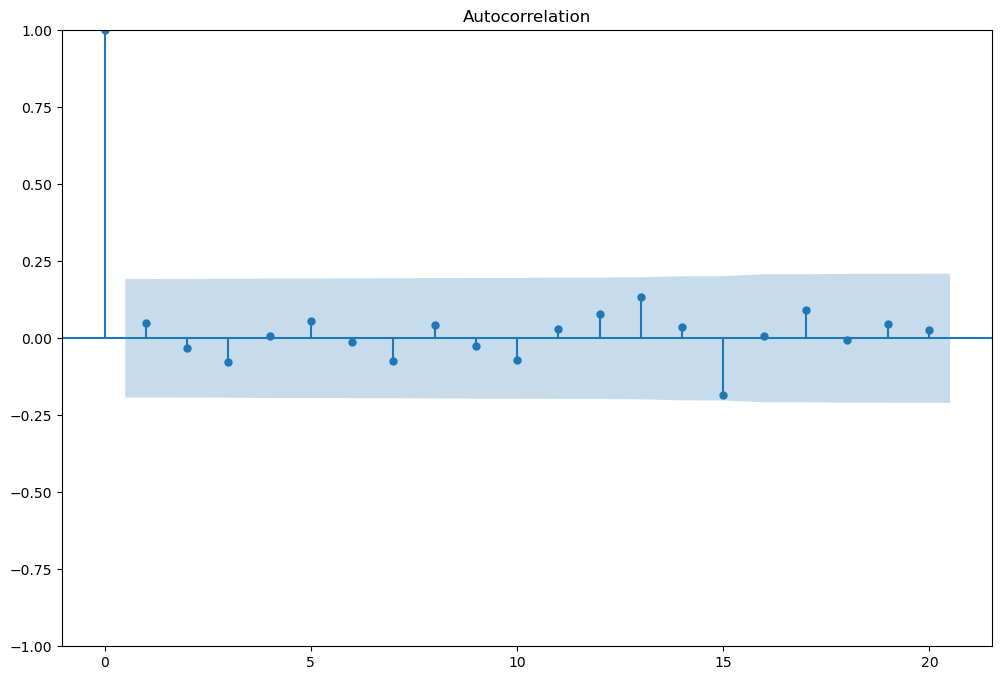

In [26]:
## Auto correlation plot for weekly aggregation data of Store 1041
plt.figure(figsize=(12,8))
plot_acf(train_1041,lags=20,  ax=plt.gca())
plt.show()

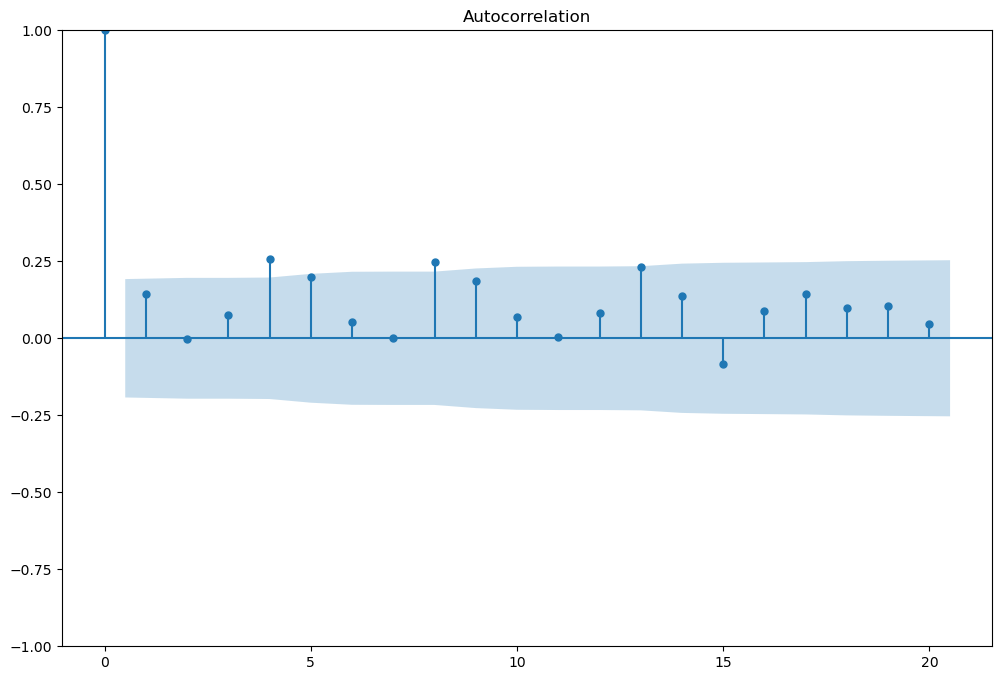

In [27]:
## Auto correlation plot for weekly aggregation data of Store 1044
plt.figure(figsize=(12,8))
plot_acf(train_1044,lags=20,  ax=plt.gca())
plt.show()

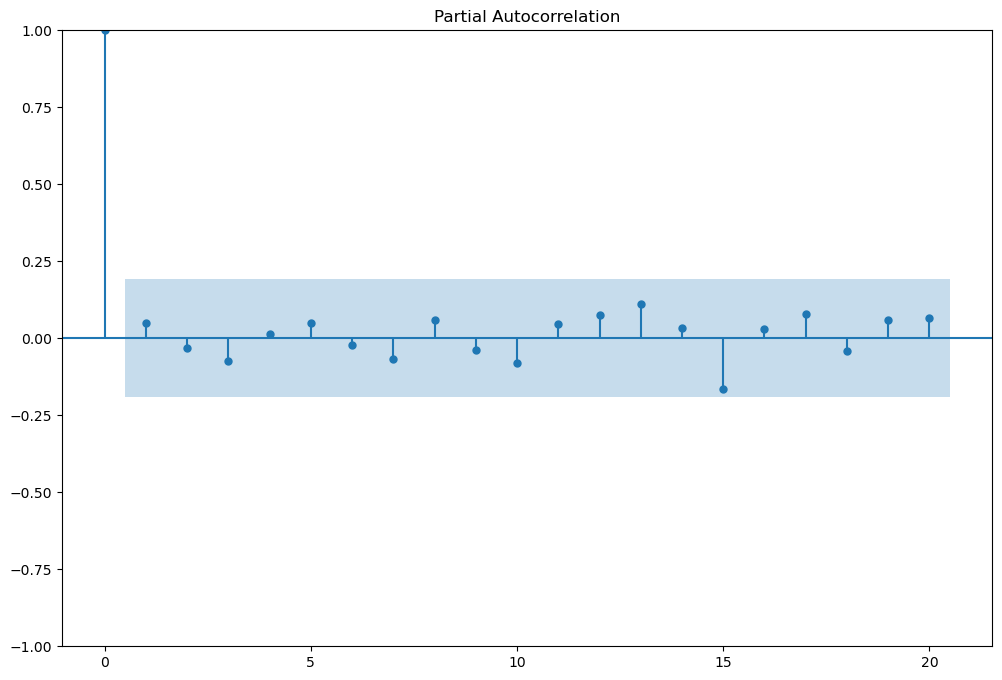

In [28]:
## Partial Auto correlation plot for weekly aggregation data of Store 1041
plt.figure(figsize=(12,8))
plot_pacf(train_1041,lags=20,  ax=plt.gca())
plt.show()

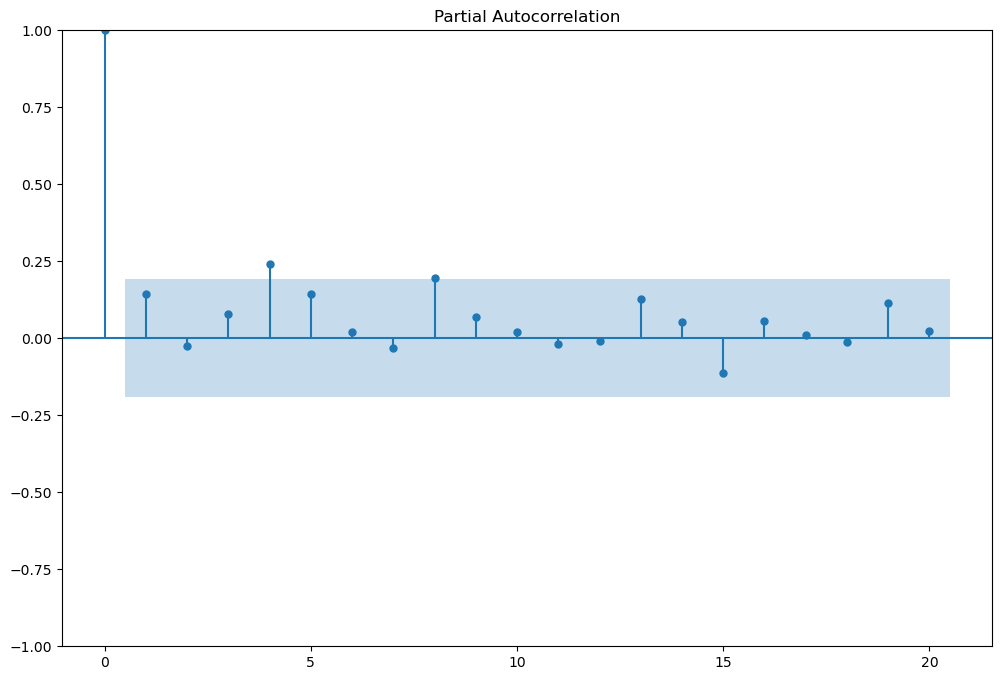

In [29]:
## Partial Auto correlation plot for weekly aggregation data of Store 1044
plt.figure(figsize=(12,8))
plot_pacf(train_1044,lags=20,  ax=plt.gca())
plt.show()

#### Task 2.4: Find the best p.d q values for ARIMA model based on least AIC values  (weightage - 6 Marks) (ME)

##### Note :ARIMA
 - Set up a grid search for p, d, and q parameters using `itertools.product`
 - Augment parameters with seasonality (e.g., 7 for weekly data).
 - print parameter combinations as below
 - Example - Model: (0, 0, 1)(0, 0, 1, 7)

In [30]:
import itertools
p = q = range(0, 4)
d= range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 7)
Model: (0, 0, 1)(0, 0, 2, 7)
Model: (0, 0, 2)(0, 0, 3, 7)
Model: (0, 0, 2)(1, 0, 0, 7)


Create an empty DataFrame (ARIMA_AIC) to store results with columns `param` and `AIC`

In [31]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
print(ARIMA_AIC)

Empty DataFrame
Columns: [param, AIC]
Index: []


##### Note :
- Create a loop through parameter combinations:
- Fit ARIMA models using training data.
- Calculate AIC values for each model.
- Store parameter combination and AIC value in ARIMA_AIC.
-  Display or analyze results in ARIMA_AIC.


In [32]:
for param in pdq:
    ARIMA_model = ARIMA(train_1041.Store_1041,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.applymap({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:1692.8377147662359
ARIMA(0, 0, 1) - AIC:1694.4981835297726
ARIMA(0, 0, 2) - AIC:1696.4482194777488
ARIMA(0, 0, 3) - AIC:1697.7217948030834
ARIMA(1, 0, 0) - AIC:1694.518301913091
ARIMA(1, 0, 1) - AIC:1696.4863941873145
ARIMA(1, 0, 2) - AIC:1698.184618283758
ARIMA(1, 0, 3) - AIC:1699.697015307794
ARIMA(2, 0, 0) - AIC:1696.388400181325
ARIMA(2, 0, 1) - AIC:1698.186644160838
ARIMA(2, 0, 2) - AIC:1696.3504779868858
ARIMA(2, 0, 3) - AIC:1695.1589289454496
ARIMA(3, 0, 0) - AIC:1697.6846436301175
ARIMA(3, 0, 1) - AIC:1699.679560033901
ARIMA(3, 0, 2) - AIC:1697.4691239007147
ARIMA(3, 0, 3) - AIC:1700.131001310589


#### Task 2.5: Build the best ARIMA and SARIMA model based on the best p,d q values for store 1041 and make predictions  (weightage - 10 Marks) (ME)

HINTS : 1. Fit the ARIMA and SARIMA model for store 1041 

        2. Plot comparing both the model predictions 

In [33]:
# mod_ARIMA_1041 = ARIMA(train_1041, order=(1,0,1))
mod_ARIMA_1041 = ARIMA(train_1041, order=(2,0,3))
results_Arima_1041 = mod_ARIMA_1041.fit()

print(results_Arima_1041.summary())

                               SARIMAX Results                                
Dep. Variable:             Store_1041   No. Observations:                  104
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -840.579
Date:                Fri, 19 Apr 2024   AIC                           1695.159
Time:                        18:20:26   BIC                           1713.670
Sample:                    01-05-2014   HQIC                          1702.658
                         - 12-27-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4884.1269     84.466     57.823      0.000    4718.576    5049.678
ar.L1         -0.0899      0.084     -1.068      0.286      -0.255       0.075
ar.L2         -0.8466      0.070    -12.167      0.0

In [34]:
len(test_1041)

23

In [35]:
pred_1041 = results_Arima_1041.forecast(steps=23)
pred_1041

2016-01-03    4946.982472
2016-01-10    4831.429045
2016-01-17    4885.218477
2016-01-24    4928.643438
2016-01-31    4879.201013
2016-02-07    4846.881310
2016-02-14    4891.645227
2016-02-21    4914.983625
2016-02-28    4874.987943
2016-03-06    4858.824617
2016-03-13    4894.138464
2016-03-20    4904.648134
2016-03-27    4873.806210
2016-04-03    4867.681014
2016-04-10    4894.342818
2016-04-17    4897.131816
2016-04-24    4874.308856
2016-05-01    4873.999249
2016-05-08    4893.349314
2016-05-15    4891.872019
2016-05-22    4875.622784
2016-05-29    4878.334154
2016-06-05    4891.847252
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [36]:
test_1041['ARIMA']= pred_1041

<Axes: xlabel='Date'>

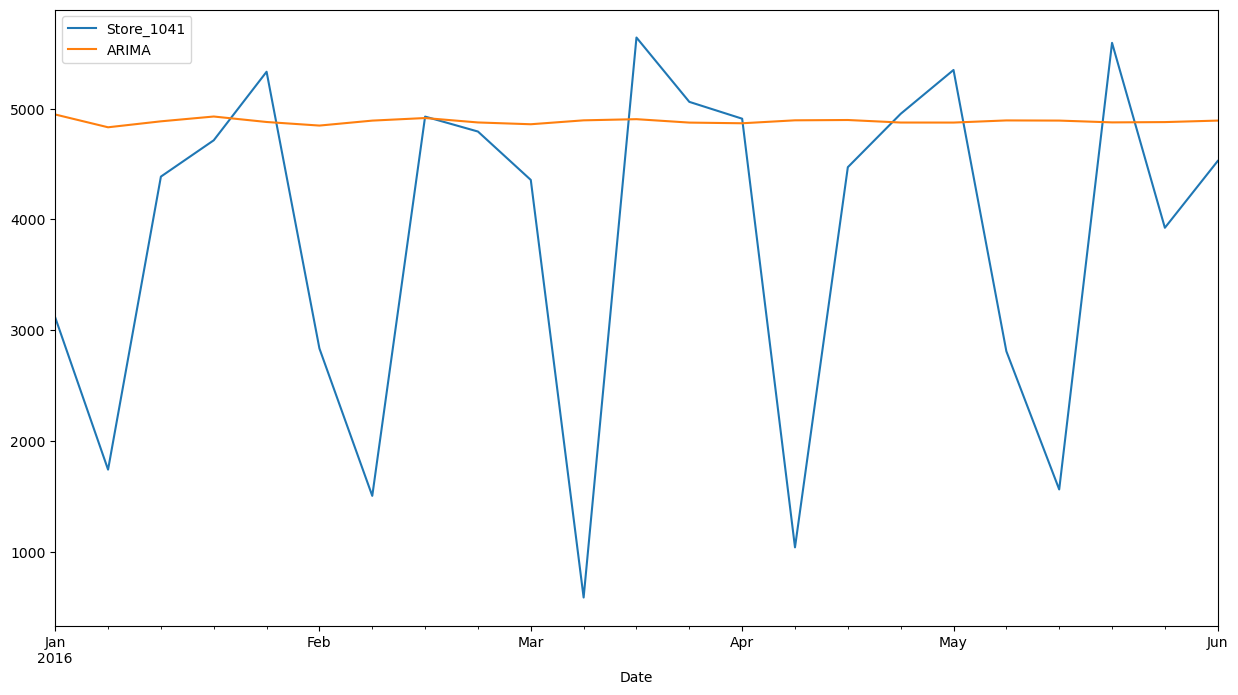

In [37]:
test_1041.plot()

#### SARIMA model 

In [38]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
print(SARIMA_AIC)

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []


In [39]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_1041 = sm.tsa.statespace.SARIMAX(train_1041,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_1041 = SARIMA_model_1041.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_1041.aic))
        SARIMA_AIC = SARIMA_AIC.applymap({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_1041.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:2047.7217682683608
SARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:1815.201158290974
SARIMA(0, 0, 0)x(0, 0, 2, 7)7 - AIC:1639.746460368501
SARIMA(0, 0, 0)x(0, 0, 3, 7)7 - AIC:1512.220059793897
SARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:1644.4415041780596
SARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:1591.7070935847778
SARIMA(0, 0, 0)x(1, 0, 2, 7)7 - AIC:1457.088950721201
SARIMA(0, 0, 0)x(1, 0, 3, 7)7 - AIC:1355.1210785836545
SARIMA(0, 0, 0)x(2, 0, 0, 7)7 - AIC:1494.9261255089748
SARIMA(0, 0, 0)x(2, 0, 1, 7)7 - AIC:1478.96155977001
SARIMA(0, 0, 0)x(2, 0, 2, 7)7 - AIC:1458.1212260560565
SARIMA(0, 0, 0)x(2, 0, 3, 7)7 - AIC:1346.5127596227655
SARIMA(0, 0, 0)x(3, 0, 0, 7)7 - AIC:1365.0899798435453
SARIMA(0, 0, 0)x(3, 0, 1, 7)7 - AIC:1356.6589713651383
SARIMA(0, 0, 0)x(3, 0, 2, 7)7 - AIC:1358.8394926441538
SARIMA(0, 0, 0)x(3, 0, 3, 7)7 - AIC:1346.2449875092905
SARIMA(0, 0, 1)x(0, 0, 0, 7)7 - AIC:1965.1469644577915
SARIMA(0, 0, 1)x(0, 0, 1, 7)7 - AIC:1744.0894358028727
SARIMA(0, 0, 1)x

In [40]:
mod_sarima_1041 = sm.tsa.statespace.SARIMAX(train_1041,           
                                order=(3,0,3),
                                seasonal_order=(3, 0, 3,7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_1041 = mod_sarima_1041.fit()
print(results_SARIMA_1041.summary())


                                     SARIMAX Results                                     
Dep. Variable:                        Store_1041   No. Observations:                  104
Model:             SARIMAX(3, 0, 3)x(3, 0, 3, 7)   Log Likelihood                -636.068
Date:                           Fri, 19 Apr 2024   AIC                           1298.137
Time:                                   18:22:13   BIC                           1328.940
Sample:                               01-05-2014   HQIC                          1310.477
                                    - 12-27-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9067      0.200      4.542      0.000       0.515       1.298
ar.L2         -0.7935      0.268     -2.964

In [41]:
pred_sarima_1041 = results_SARIMA_1041.forecast(steps=23)

In [42]:
test_1041['SARIMA']=pred_sarima_1041

In [43]:
test_1041

Store_1041        ARIMA       SARIMA
Date                                            
2016-01-03      3114.0  4946.982472  4861.446542
2016-01-10      1740.0  4831.429045  5048.543239
2016-01-17      4386.0  4885.218477  5155.909538
2016-01-24      4714.0  4928.643438  5177.292608
2016-01-31      5333.0  4879.201013  5040.019352
2016-02-07      2834.0  4846.881310  4956.987661
2016-02-14      1503.0  4891.645227  5215.399367
2016-02-21      4928.0  4914.983625  5164.366518
2016-02-28      4793.0  4874.987943  4973.157496
2016-03-06      4356.0  4858.824617  5127.126558
2016-03-13       585.0  4894.138464  5023.939838
2016-03-20      5642.0  4904.648134  4957.058086
2016-03-27      5061.0  4873.806210  5162.172498
2016-04-03      4909.0  4867.681014  4954.480223
2016-04-10      1038.0  4894.342818  5094.059015
2016-04-17      4471.0  4897.131816  5087.673857
2016-04-24      4953.0  4874.308856  5040.856322
2016-05-01      5349.0  4873.999249  5118.959373
2016-05-08      2809.0  4893.349314  5157.302170
2016-05-15      1561.0  4891.872019  5053.090016
2016-05-22      5594.0  4875.622784  5068.953220
2016-05-29      3924.0  4878.334154  5131.713876
2016-06-05      4527.0  4891.847252  5103.936633

<Axes: xlabel='Date'>

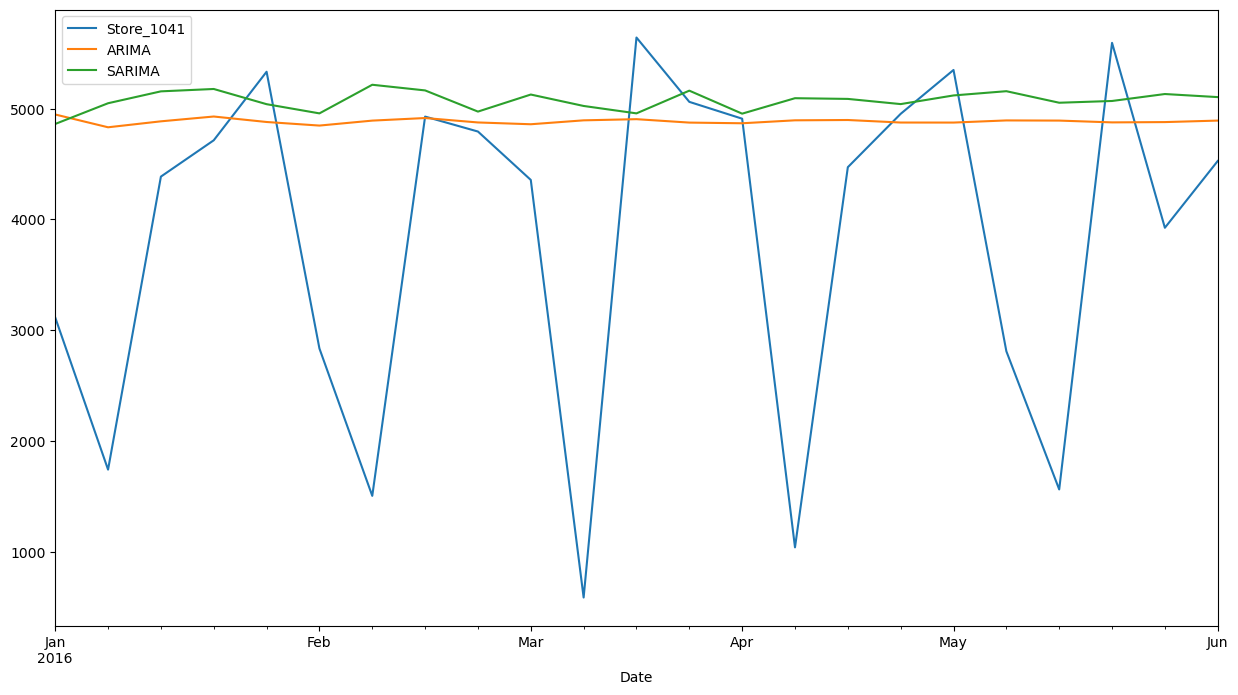

In [44]:
test_1041.plot()

#### T2.6 : Perform Model evaluation and print various evaluation metrics (MSE, RMSE, MAE, MAPE) (weightage - 6 Marks) (ME) 

**A Standard define functions for an Time-Series model evaluation metrics**

In [45]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')

**Evaluation metrics for ARIMA model**

In [49]:
timeseries_evaluation_metrics_func(test_1041['Store_1041'],pred_1041)

Evaluation metric results:-
MSE is : 3506320.216525914
MAE is : 1289.3642383069628
RMSE is : 1872.5170804363613
MAPE is : 89.10931983236384


**Evaluation metrics for SARIMA model**

In [48]:
timeseries_evaluation_metrics_func(test_1041['Store_1041'], pred_sarima_1041)

Evaluation metric results:-
MSE is : 3944335.125184693
MAE is : 1392.0201714315674
RMSE is : 1986.0350261726737
MAPE is : 94.4349821015792


#### T2.7 : Save the initial version of ARIMA model as “ARIMA_Model_Storeid” and “SARIMA_Model_Storeid” to a version controlsystem GitHub using git commands for collaboration, tracking and ensuring transparency in model development.  (weightage - 2 Marks) (ME)

#### T2.8 : Model Explainability - Using Lime/SHAP libraries, explain the prediction of your time series model and give inferences.   (weightage – 5 marks)(ME)

## Task 3: Model Deployment: Deploy the trained model into a production environment, allowing stakeholders to utilize it for real-time forecasting Develop an intuitive user interface to facilitate easy interaction with the model. (weightage – 10 marks) 

#### T3.1 Model deployment step (saving the file as a .t5 model)      (weightage – 2 marks)(ME)

#### T3.2 Implement the unit test cases and use the saved .t5 model file to create a webapp using flask/streamlit code    (weightage – 8 marks)(ME)